In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../..')
import omama as O
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
odl = O.OutlierDetectorLite()

In [3]:
data_imgs = odl.load_data(DATASET='B')

In [4]:
gt = odl.load_ground_truth('B')

In [5]:
len(data_imgs)

100

In [6]:
binary_bin_feats = O.Features.get_features(data=data_imgs, feature_type='hist', norm_type='minmax', bins=5)

In [7]:
bad_images = []
bad_indexes_found = []
paths = []
for i, binary in enumerate(binary_bin_feats):
    if binary[4] > 15000 or binary[1] < 2000:
        print(i, binary)
        bad_images.append(data_imgs[i])
        paths.append(data_imgs[i].filePath)
        bad_indexes_found.append(i)

6 [2647021   19223  683399  883726  157347]
13 [2362073  188710 1404113  283727  152093]
17 [2977350  921716   65750  297245  128655]
36 [2562034  227491 1169117  333755   98319]
43 [2654204   33784 1130129  411054  161545]
57 [2837801   15013  223174 1208486  106242]
62 [2918948  205467  844197  265226  156878]
69 [2089187 1130134  594192  335013  242190]
76 [2260384  212149 1459677  292217  166289]
81 [2184000  207194 1566179  326491  106852]


In [8]:
np.where(np.array(gt)>0)

(array([ 0,  6, 13, 17, 36, 43, 57, 62, 69, 76, 81, 88, 95]),)

In [9]:
len(bad_images)

10

In [11]:
preds = O.DataHelper.build_gt(100, bad_indexes_found)

In [12]:
f1 = sklearn.metrics.f1_score(gt, preds)

In [13]:
f1

0.8695652173913044

In [10]:
bad_images2 = []
for item in np.where(np.array(gt)>0):
    for index in item:
        bad_images2.append(data_imgs[index])

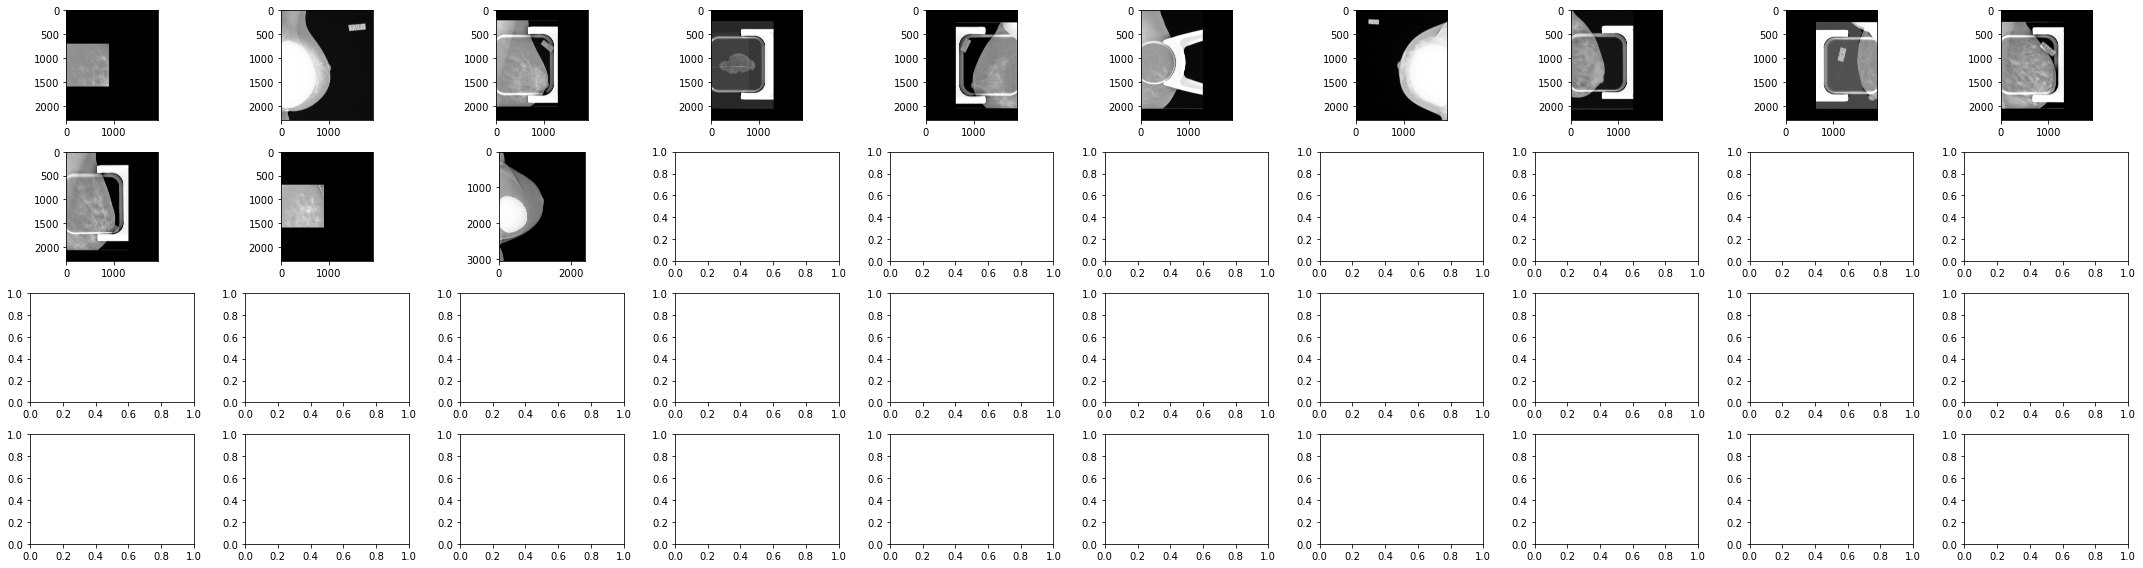

In [23]:
O.DataHelper.view_grid(bad_images2, ncols=10)